<!--BOOK_INFORMATION-->
<img align="left" style="width:80px;height:98px;padding-right:20px;" src="https://raw.githubusercontent.com/joe-papa/pytorch-book/main/files/pytorch-book-cover.jpg">

This notebook contains an excerpt from the [PyTorch Pocket Reference](http://pytorchbook.com) book by [Joe Papa](http://joepapa.ai); content is available [on GitHub](https://github.com/joe-papa/pytorch-book).

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/joe-papa/pytorch-book/blob/main/03_Deep_Learning_Development_with_PyTorch.ipynb)

# Chapter 3 - Deep Learning Development with PyTorch

In [1]:
import torch
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## Data Loading

In [2]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="./train/", train=True, download=True)
test_data = CIFAR10(root="./test/", train=False, download=True)

100%|██████████| 170498071/170498071 [00:13<00:00, 12589067.42it/s]


Extracting ./train/cifar-10-python.tar.gz to ./train/


100%|██████████| 170498071/170498071 [00:14<00:00, 12027633.34it/s]


Extracting ./test/cifar-10-python.tar.gz to ./test/


In [3]:
print(train_data)
# out:
# Dataset CIFAR10
#     Number of datapoints: 50000
#     Root location: ./train/
#     Split: Train

print(len(train_data))
# out: 50000

print(train_data.data.shape) # ndarray
# out: (50000, 32, 32, 3)

print(train_data.targets) # list
# out: [6, 9, ...,  1, 1]

print(train_data.classes)
# out: ['airplane', 'automobile', 'bird',
#       'cat', 'deer', 'dog', 'frog',
#       'horse', 'ship', 'truck']

print(train_data.class_to_idx)
# out:
# {'airplane': 0, 'automobile': 1, 'bird': 2,
#  'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6,
#  'horse': 7, 'ship': 8, 'truck': 9}

print(test_data)
# out:
# Dataset CIFAR10
#     Number of datapoints: 10000
#     Root location: ./test/
#     Split: Test

print(len(test_data))
# out: 10000

data, label = train_data[0]

print(test_data.data.shape) # ndarray
# out: (10000, 32, 32, 3)

print(type(label))
# out: <class 'int'>

print(label)
# out: 6

print(train_data.classes[label])
# out: frog

print(type(train_data[0]))
# out: <class 'tuple'>

print(len(train_data[0]))
# out: 2

print(type(data))
# out: <class 'PIL.Image.Image'>

print(data)
# out:
# <PIL.Image.Image image mode=RGB
#       size=32x32 at 0x7FA61D6F1748>

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
50000
(50000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0,

In [4]:
data, label = train_data[20]
print(label)

print(train_data[20][1])

4
4


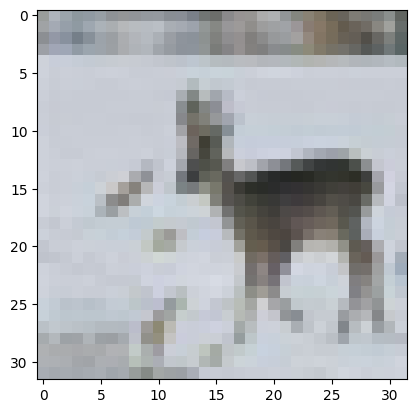

In [5]:
import matplotlib.pyplot as plt

plt.imshow(data)

**1.	Questions: How do you access the label? What method is called when you index into a Dataset? Is CIFAR10 a class that is derived from Dataset?**

Index into the dataset using square brackets, returns a tuple.

 __ __getitem__ __() is called when indexing into the dataset

Yes, CIFAR10 is a class that is derived from Dataset. CIFAR10 is derived from torchvision.datasets



In [6]:
import inspect
from torchvision.datasets import CIFAR10

def get_inheritance_tree(cls):
    inheritance_tree = [cls.__name__]
    for base in cls.__bases__:
        inheritance_tree.extend(get_inheritance_tree(base))
    return inheritance_tree

# Get the inheritance tree for CIFAR10
inheritance_tree = get_inheritance_tree(CIFAR10)

# Print the inheritance tree
for class_name in inheritance_tree:
    print(class_name)

CIFAR10
VisionDataset
Dataset
Generic
object


**2.	Question: Please provide the inheritance tree for the CIFAR10 dataset in pytorch.**

CIFAR10

VisionDataset

Dataset

Generic

object

## Data Transforms

In [7]:
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./train/", train=True, transform=train_transforms)

test_transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

test_data = torchvision.datasets.CIFAR10( root="./test/", train=False, transform=test_transforms)

**3.	Question: When you instantiate train_data the second time, with the transform, try without download=True. Look at the API. What does it say?**

download (bool, optional) – If true, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.

Since it is already downloaded. It didn’t have any errors. Even without download= True. The data is not downloaded again.


In [8]:
print(train_data)
# out:
# Dataset CIFAR10
#     Number of datapoints: 50000
#     Root location: ./train/
#     Split: Train
#     StandardTransform
# Transform: Compose(
#                RandomCrop(size=(32, 32),
#                  padding=4)
#                RandomHorizontalFlip(p=0.5)
#                ToTensor()
#                Normalize(
#                  mean=(0.4914, 0.4822, 0.4465),
#                  std=(0.2023, 0.1994, 0.201))
#            )

print(train_data.transforms)
# out:
# StandardTransform
# Transform: Compose(
#                RandomCrop(size=(32, 32),
#                  padding=4)
#                RandomHorizontalFlip(p=0.5)
#                ToTensor()
#                Normalize(
#                  mean=(0.4914, 0.4822, 0.4465),
#                  std=(0.2023, 0.1994, 0.201))
#            )

print(test_data)
# out:
# Dataset CIFAR10
#     Number of datapoints: 10000
#     Root location: ./test/
#     Split: Test
#     StandardTransform
# Transform: Compose(
#     ToTensor()
#     Normalize(
#       mean=(0.4914, 0.4822, 0.4465),
#       std=(0.2023, 0.1994, 0.201)))

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


**4.	Question: What is the difference between training and testing transforms? Training is supposed to ”see” more data variability and that is why we provide augmentations of the original data through transforms. Why do you think the test dataset has a different transform?**

Here training transform, used data augmentation methods like random horizontal flipping and cropping, in addition to the testing transforms, normalization and conversion to tensors. This strategy was used to enhance the training dataset so that the model could learn more and become more general. It was crucial because real-world data frequently contains variations and difficulties that are different from those in training data. However, because the data consistently represented real-world scenarios during the testing phase, concentrated on maintaining the data's realism. The true performance of the model might be distorted by adding data augmentation to the testing transformations.

In [9]:
data, label = train_data[0]

print(type(data))
# out: <class 'torch.Tensor'>

print(data.size())
# out: torch.Size([3, 32, 32])

print(data)
# out:
# tensor([[[-0.1416,  ..., -2.4291],
#          [-0.0060,  ..., -2.4291],
#          [-0.7426,  ..., -2.4291],
#          ...,
#          [ 0.5100, ..., -2.2214],
#          [-2.2214, ..., -2.2214],
#          [-2.2214, ..., -2.2214]]])

<class 'torch.Tensor'>
torch.Size([3, 32, 32])
tensor([[[ 0.1879,  0.1297,  0.0910,  ..., -2.4291, -2.4291, -2.4291],
         [-0.1223, -0.0835,  0.0328,  ..., -2.4291, -2.4291, -2.4291],
         [-0.3549, -0.1029,  0.2073,  ..., -2.4291, -2.4291, -2.4291],
         ...,
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291],
         [-2.4291, -2.4291, -2.4291,  ..., -2.4291, -2.4291, -2.4291]],

        [[-0.5892, -0.6482, -0.6286,  ..., -2.4183, -2.4183, -2.4183],
         [-0.8646, -0.8646, -0.7662,  ..., -2.4183, -2.4183, -2.4183],
         [-1.0809, -0.8449, -0.5106,  ..., -2.4183, -2.4183, -2.4183],
         ...,
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183],
         [-2.4183, -2.4183, -2.4183,  ..., -2.4183, -2.4183, -2.4183]],

        [[-1.2264, -1.2654, -1.2459,  ..., -2.2214, -2.2214, -2.2214]

**5.	Question: Why is your result different when you apply transforms?**

The data is normalized and converted to tensor while applying transform.  So, it provided a tensor. Instead of a image before transforming. Also, the data augmentation during transform did a lot of changes to the image making it a different one than before transform.


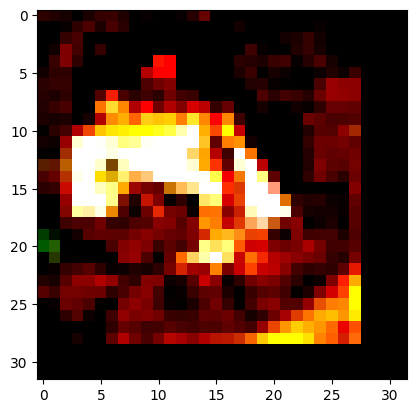

In [10]:
plt.imshow(data.permute(1, 2, 0))

## Data Batching

In [11]:
trainloader = torch.utils.data.DataLoader( train_data, batch_size=16, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=16,shuffle=False)

In [12]:
data_batch, labels_batch = next(iter(trainloader))
print(data_batch.size())
# out: torch.Size([16, 3, 32, 32])

print(labels_batch.size())
# out: torch.Size([16])

torch.Size([16, 3, 32, 32])
torch.Size([16])


## Model Design



### Using Existing & Pre-trained models

## VGG16

In [13]:
from torchvision import models

vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 271MB/s]


In [14]:
print(vgg16.classifier)

# out:
# Sequential(
#   (0): Linear(in_features=25088,
#               out_features=4096, bias=True)
#   (1): ReLU(inplace=True)
#   (2): Dropout(p=0.5, inplace=False)
#   (3): Linear(in_features=4096,
#               out_features=4096, bias=True)
#   (4): ReLU(inplace=True)
#   (5): Dropout(p=0.5, inplace=False)
#   (6): Linear(in_features=4096,
#               out_features=1000, bias=True)
# )

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


In [15]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
import torch.nn as nn

vgg16.classifier[-1] = nn.Linear(4096, 10)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = vgg16.to(device=device)

**6.	Cell 2 will replace the very last layer of the vgg model (why?)**

To match output dimensions (targets)


In [17]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [18]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, epoch_loss/len(trainloader)))

Epoch: 0 Loss: 0.8228841980290413
Epoch: 1 Loss: 0.5158047677087784
Epoch: 2 Loss: 0.41473339481770993
Epoch: 3 Loss: 0.3588843879494071
Epoch: 4 Loss: 0.3167015874288231
Epoch: 5 Loss: 0.2823167909161747
Epoch: 6 Loss: 0.2536168212260306
Epoch: 7 Loss: 0.2295957287239842
Epoch: 8 Loss: 0.20908941618956625
Epoch: 9 Loss: 0.19165317829051987


In [19]:
#Testing cell

num_correct = 0.0

for x_test_batch, y_test_batch in testloader:

  model.eval()
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()

accuracy = num_correct/(len(testloader)*testloader.batch_size)

print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

625 16
Test Accuracy: 0.8951999545097351


## LeNet5

In [20]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5().to(device=device)

In [21]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [22]:
N_EPOCHS = 10
for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, labels in trainloader:
        inputs = inputs.to(device) # <2>
        labels = labels.to(device)

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, labels) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, epoch_loss/len(trainloader)))

Epoch: 0 Loss: 1.9246351346969603
Epoch: 1 Loss: 1.587353373413086
Epoch: 2 Loss: 1.4661875563240052
Epoch: 3 Loss: 1.3772414971351623
Epoch: 4 Loss: 1.317479870929718
Epoch: 5 Loss: 1.2702611097717285
Epoch: 6 Loss: 1.2339706152629852
Epoch: 7 Loss: 1.1945110561180114
Epoch: 8 Loss: 1.1731082354354858
Epoch: 9 Loss: 1.1555689557170867


In [23]:
#Testing cell

num_correct = 0.0

for x_test_batch, y_test_batch in testloader:

  model.eval()
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()

accuracy = num_correct/(len(testloader)*testloader.batch_size)

print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

625 16
Test Accuracy: 0.609499990940094


**7.	 Please compare these two performances on CIFAR10. Why is one better than another?**

LeNet5 got an accuracy of 0.609

VGG16 had an accuracy of 0.895

VGG16 performed better than LeNet5. This is because both are different models and had different model complexities.


**Problem 2**

In [122]:
targets = [1, 3, 5, 9]

indices = [i for i, label in enumerate(train_data.targets) if label in targets]
indices_test = [i for i, label in enumerate(test_data.targets) if label in targets]

from torch.utils.data.dataset import Subset

train_subset = Subset(train_data, indices)
test_subset = Subset(test_data, indices_test)

In [123]:
labmap = {i:x for i, x in enumerate(targets)}
labmap

{0: 1, 1: 3, 2: 5, 3: 9}

In [124]:
trainloader = torch.utils.data.DataLoader( train_subset, batch_size=16, shuffle=False)
testloader = torch.utils.data.DataLoader( test_subset, batch_size=16, shuffle=False)

**VGG16**

In [104]:
from torchvision import models

vgg16 = models.vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [106]:
import torch.nn as nn

vgg16.classifier[-1] = nn.Linear(4096, len(targets) )
device = "cuda" if torch.cuda.is_available() else "cpu"
model = vgg16

In [107]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [128]:
N_EPOCHS = 3
label_mapping = {1: 0, 3: 1, 5: 2, 9: 3}

for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, targets in trainloader:
        #inputs = inputs.to(device) # <2>
        #labels = labels.to(device)
        targets = torch.tensor([label_mapping[label.item()] for label in targets])

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, targets) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, epoch_loss/len(trainloader)))

Epoch: 0 Loss: 0.7385602687835693
Epoch: 1 Loss: 0.7171586565732956
Epoch: 2 Loss: 0.6961472003936767


In [130]:
num_correct = 0.0

for x_test_batch, y_test_batch in testloader:
  model.eval()
  #y_test_batch = y_test_batch.to(device)
  #x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()

accuracy = num_correct/(len(testloader)*testloader.batch_size)

print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

250 16
Test Accuracy: 0.020250000059604645


**LeNet5**

In [110]:
from torch import nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # <1>
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 4)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, int(x.nelement() / x.shape[0]))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = "cuda" if torch.cuda.is_available() else "cpu"
model = LeNet5()

In [111]:
from torch import optim
from torch import nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [112]:
N_EPOCHS = 3
label_mapping = {1: 0, 3: 1, 5: 2, 9: 3}

for epoch in range(N_EPOCHS): # <1>

    epoch_loss = 0.0
    for inputs, targets in trainloader:
        #inputs = inputs.to(device) # <2>
        #labels = labels.to(device)
        targets = torch.tensor([label_mapping[label.item()] for label in targets])

        optimizer.zero_grad() # <3>

        outputs = model(inputs) # <4>
        loss = criterion(outputs, targets) # <5>
        loss.backward() # <6>
        optimizer.step() # <7>

        epoch_loss += loss.item() # <8>
    print("Epoch: {} Loss: {}".format(epoch, epoch_loss/len(trainloader)))

Epoch: 0 Loss: 1.2099425859451294
Epoch: 1 Loss: 0.8838856277942657
Epoch: 2 Loss: 0.81627459461689


In [125]:
num_correct = 0.0

for x_test_batch, y_test_batch in testloader:
  model.eval()
  #y_test_batch = y_test_batch.to(device)
  #x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch)
  _, predicted = torch.max(y_pred_batch, 1)
  num_correct += (predicted == y_test_batch).float().sum()

accuracy = num_correct/(len(testloader)*testloader.batch_size)

print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))

250 16
Test Accuracy: 0.014999999664723873


**Comparing the two performances. Why is one better than another?**

LeNet5 got an accuracy of 0.0149

VGG16 had an accuracy of 0.0202

Both models didn't perfomed well.


**ISSUES :** Encountered an issue while running the second problem. I first attempted to use model.to(device=device) to connect the model to a particular device (either GPU or CPU). This strategy, though, resulted in a runtime error. So, I explicit device handling (model.to(device)) and used PyTorch's automatic device placement.